# 2.1.8 [Preparing a Dataset for Modeling](https://courses.thinkful.com/data-201v1/project/2.1.8)

Select an outcome variable and then pick 4-5 other variables
* 1-2 categorical
* 3-4 continuous

I chose a telco dataset from kaggle with [churn](https://www.kaggle.com/vhcg77/telcom-churns-dataset) as the target variable

1. Explore variables using univariate & bivariate methods

2. Create 10 new features, explain reasoning

3. Use filtering methods to select the 5 best features and justify your choices.

**Variables in the Dataset**
* Churn - flag and Target Variable
* customerID - unique id for each customer
**Categorical Variables**
* gender - 'Female', 'Male'
* SeniorCitizen - 0,1
* MaritalStatus - 'Yes', 'No'
* Dependents - 'Yes', 'No'
* MultipleLines - 'Yes', 'No'
* InternetService - 'DSL' 'Fiber optic' 'No'
* OnlineSecurity - 'No', 'Yes', 'No internet service'
* OnlineBackup - 'No', 'Yes', 'No internet service'
* DeviceProtection - 'No', 'Yes', 'No internet service'
* TechSupport - 'No', 'Yes', 'No internet service'
* StreamingTV - 'No', 'Yes', 'No internet service'
* StreamingMovies - 'No', 'Yes', 'No internet service'
* Contract - 'One year' 'Month-to-month' 'Two year'
* PaperlessBilling
* PaymentMethod - 'Mailed check' 'Electronic check' 'Credit card (automatic)', 'Bank transfer (automatic)'
* InternationalPlan - 'Yes', 'No'
* VoiceMailPlan - 'Yes', 'No'

**Continuous Variables**
* tenure - Seams Exponential... has a long taile of decay but most drop off in the first month
* NumbervMailMessages - big chunk have no voicemails, then maybe normal or Beta
* TotalDayMinutes - Normalish
* TotalDayCalls - normalish
* TotalEveMinutes - normalish
* TotalEveCalls - normalish
* TotalNightMinutes - normalish
* TotalNightCalls - normalish
* TotalIntlMinutes - has a long tail
* TotalIntlCalls - has a long tail
* CustomerServiceCalls - Poisson 0 to 10
* TotalCall Normal is
* TotalRevenue


[churn](https://www.kaggle.com/filemide/churns)

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
%matplotlib inline

from sklearn.utils import resample

In [109]:
#dt_demo = pd.read_csv('unit_2_data/telco_customer_churn.csv')
dt_call = pd.read_csv('unit_2_data/telco_churn_dataset.csv')

# Minutes/Call
dt_call['TotalMinutes'] = dt_call['TotalDayMinutes'] + dt_call['TotalEveMinutes'] + dt_call['TotalNightMinutes']
dt_call['MinutesPerCall'] = dt_call['TotalMinutes']/dt_call['TotalCall']

# Percent of Calls at night
dt_call['PercentNightCalls'] = dt_call['TotalNightCalls']/dt_call['TotalCall']
dt_call['PercentDayCalls'] = dt_call['TotalDayCalls']/dt_call['TotalCall']

# New subscriber flag (in first cycle of contract)
dt_call['tenure_num'] = np.where(dt_call['tenure']==0, 0.0, 
                                 np.where(dt_call['Contract']=='One year', dt_call['tenure']/12.0,
                                          np.where(dt_call['Contract']=='Two year', dt_call['tenure']/24.0,
                                                   dt_call['tenure']
                                                  )))
dt_call['new_sub_flag'] = np.where(dt_call['tenure_num']<=1, 1, 0)
dt_call['messages'] = np.where(dt_call['NumbervMailMessages'] >=1, 1, 0)

dt_call['Churn'] = np.where(dt_call['Churn']== 'Yes',1,0)
dt_call.drop(['customerID','TotalRevenue'],axis=1, inplace=True)

In [34]:
dt_call.head()

,customerID,gender,SeniorCitizen,MaritalStatus,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCall,TotalRevenue,Churn,TotalMinutes,MinutesPerCall,PercentNightCalls,PercentDayCalls,tenure_num,new_sub_flag,messages
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,354,593.3,0,615.0,1.737288,0.299435,0.387006,0.750000,1,0
1,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,...,326,280.9,1,423.4,1.298773,0.325153,0.343558,4.000000,0,0
2,0013-MHZWF,Female,0,No,Yes,9,Yes,No,DSL,No,...,324,571.5,0,484.1,1.494136,0.253086,0.413580,9.000000,0,1
3,0013-SMEOE,Female,1,Yes,No,71,Yes,No,Fiber optic,Yes,...,228,7904.3,0,582.4,2.554386,0.403509,0.298246,2.958333,0,0
4,0015-UOCOJ,Female,1,No,No,7,Yes,No,DSL,Yes,...,294,340.4,0,499.9,1.700340,0.465986,0.231293,7.000000,0,0


In [35]:
# Overview of continuous variable stats
dt_call.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,3333.0,0.110111,0.313075,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,3333.0,28.001500,23.262239,0.000000,7.000000,23.000000,48.000000,72.000000
NumbervMailMessages,3333.0,8.099010,13.688365,0.000000,0.000000,0.000000,20.000000,51.000000
TotalDayMinutes,3333.0,179.775098,54.467389,0.000000,143.700000,179.400000,216.400000,350.800000
TotalDayCalls,3333.0,100.435644,20.069084,0.000000,87.000000,101.000000,114.000000,165.000000
TotalEveMinutes,3333.0,200.980348,50.713844,0.000000,166.600000,201.400000,235.300000,363.700000
TotalEveCalls,3333.0,100.114311,19.922625,0.000000,87.000000,100.000000,114.000000,170.000000
TotalNightMinutes,3333.0,200.872037,50.573847,23.200000,167.000000,201.200000,235.300000,395.000000
TotalNightCalls,3333.0,100.107711,19.568609,33.000000,87.000000,100.000000,113.000000,175.000000
TotalIntlMinutes,3333.0,10.237294,2.791840,0.000000,8.500000,10.300000,12.100000,20.000000


## I really don't need minutes and calls for all of these they are going to be correlated. I may want some combos though
**My continuous variables**
* tenure - because as brand new customers will be more vulnerable, also will depend on length of contract
* total_calls - will show how much customer actually use the service
* minutes/call - total calls and total minutes should be correlated, using minutes/call we get a look at whether calls are quick things are if the person takes alot of short calls
* % night calls - time of day may describe a different type of customer, some accounts will be priced differently based om time of day of calls
* % day calls - same and % night calls, will not include % evening cals because it is implied from these two metrics
* CustomerServiceCalls - if someone frequently contacts customer service they may have more issues with the service and more likely to churn, however this will not be a linear relationship, more likely log with most people never calling customer service

**My Categorical Variables**
* Internet Service - if they have more than just telephone customer will have a stronger relationship, more issues switching services
* Contract - there are month-to-month, yearly, 2 year, month-to-month will have more opportunities to churn and is probably someone looking for flexiblility and will be more likely to use the flexibility
* Paperless Billing - these are more tech saavy customers, likely younger, thinking more likely to churn?
* Has Voicemail & Uses Voicemail
* Has InternationalPlan & Uses International Plan

**Variables to Create**
* first suscription
* try a bunch of tenure distributions
* Minutes/Call
* % of calls night
* % of calls day #I'm not going to do % of calls evening because that is implied by having the other 2 metrics
* has vMail Message, there could be something in have more than average voicemails but feeling lazy
* Has Voicemail & Uses Voicemail
* Has InternationalPlan & Uses International Plan

In [12]:
dt_call['Churn'] = np.where(dt_call['Churn']=='Yes', 1, 0)
dt_call['paper'] = np.where(dt_call['PaperlessBilling']=='Yes',1,0)
dt_call.groupby(['Churn']).mean().T

Churn,0,1
SeniorCitizen,0.095789,0.194617
tenure,30.893333,10.937888
NumbervMailMessages,8.604561,5.115942
TotalDayMinutes,175.175754,206.914079
TotalDayCalls,100.283158,101.335404
TotalEveMinutes,199.043298,212.410145
TotalEveCalls,100.038596,100.561077
TotalNightMinutes,200.133193,205.231677
TotalNightCalls,100.058246,100.399586
TotalIntlMinutes,10.158877,10.700000


In [14]:
categories = [['gender', 'SeniorCitizen', 'MaritalStatus', 'Dependents', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'InternationalPlan', 'VoiceMailPlan']]

In [30]:
pd.DataFrame(dt_call.groupby('PaperlessBilling')['Churn'].mean())

,Churn
PaperlessBilling,
No,0.100122
Yes,0.188201


In [31]:
for x in categories:
    #print(x)
    g = pd.DataFrame(dt_call.groupby(x)['Churn'].mean())
    print(g)


                                                                                                                                                                                                                                                                                                  Churn
gender SeniorCitizen MaritalStatus Dependents MultipleLines InternetService OnlineSecurity      OnlineBackup        DeviceProtection    TechSupport         StreamingTV         StreamingMovies     Contract       PaperlessBilling PaymentMethod             InternationalPlan VoiceMailPlan          
Female 0             No            No         No            DSL             No                  No                  No                  No                  No                  No                  Month-to-month No               Bank transfer (automatic) No                No             0.000000
                                                                                                                

#### Do any of my continuous variables have known distributions?

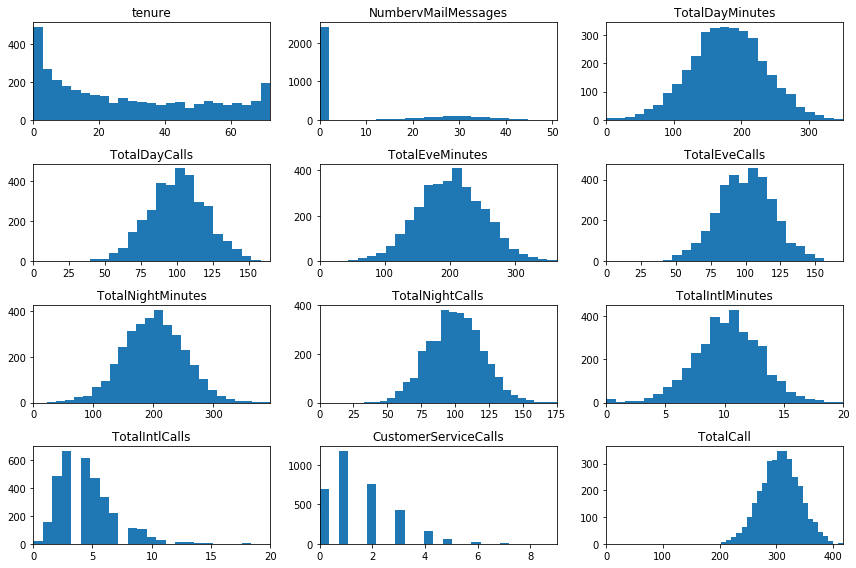

In [32]:
plt.figure(figsize=(12,8))
n = 0

for x in continuous:    
    n=n+1
    plt.subplot(4,3,n)
    plt.hist(dt_call[x], bins=25)
    plt.xlim(0,dt_call[x].max())
    plt.xlabel('')
    plt.ylabel('')
    
    plt.title(x)
plt.tight_layout()
plt.show()

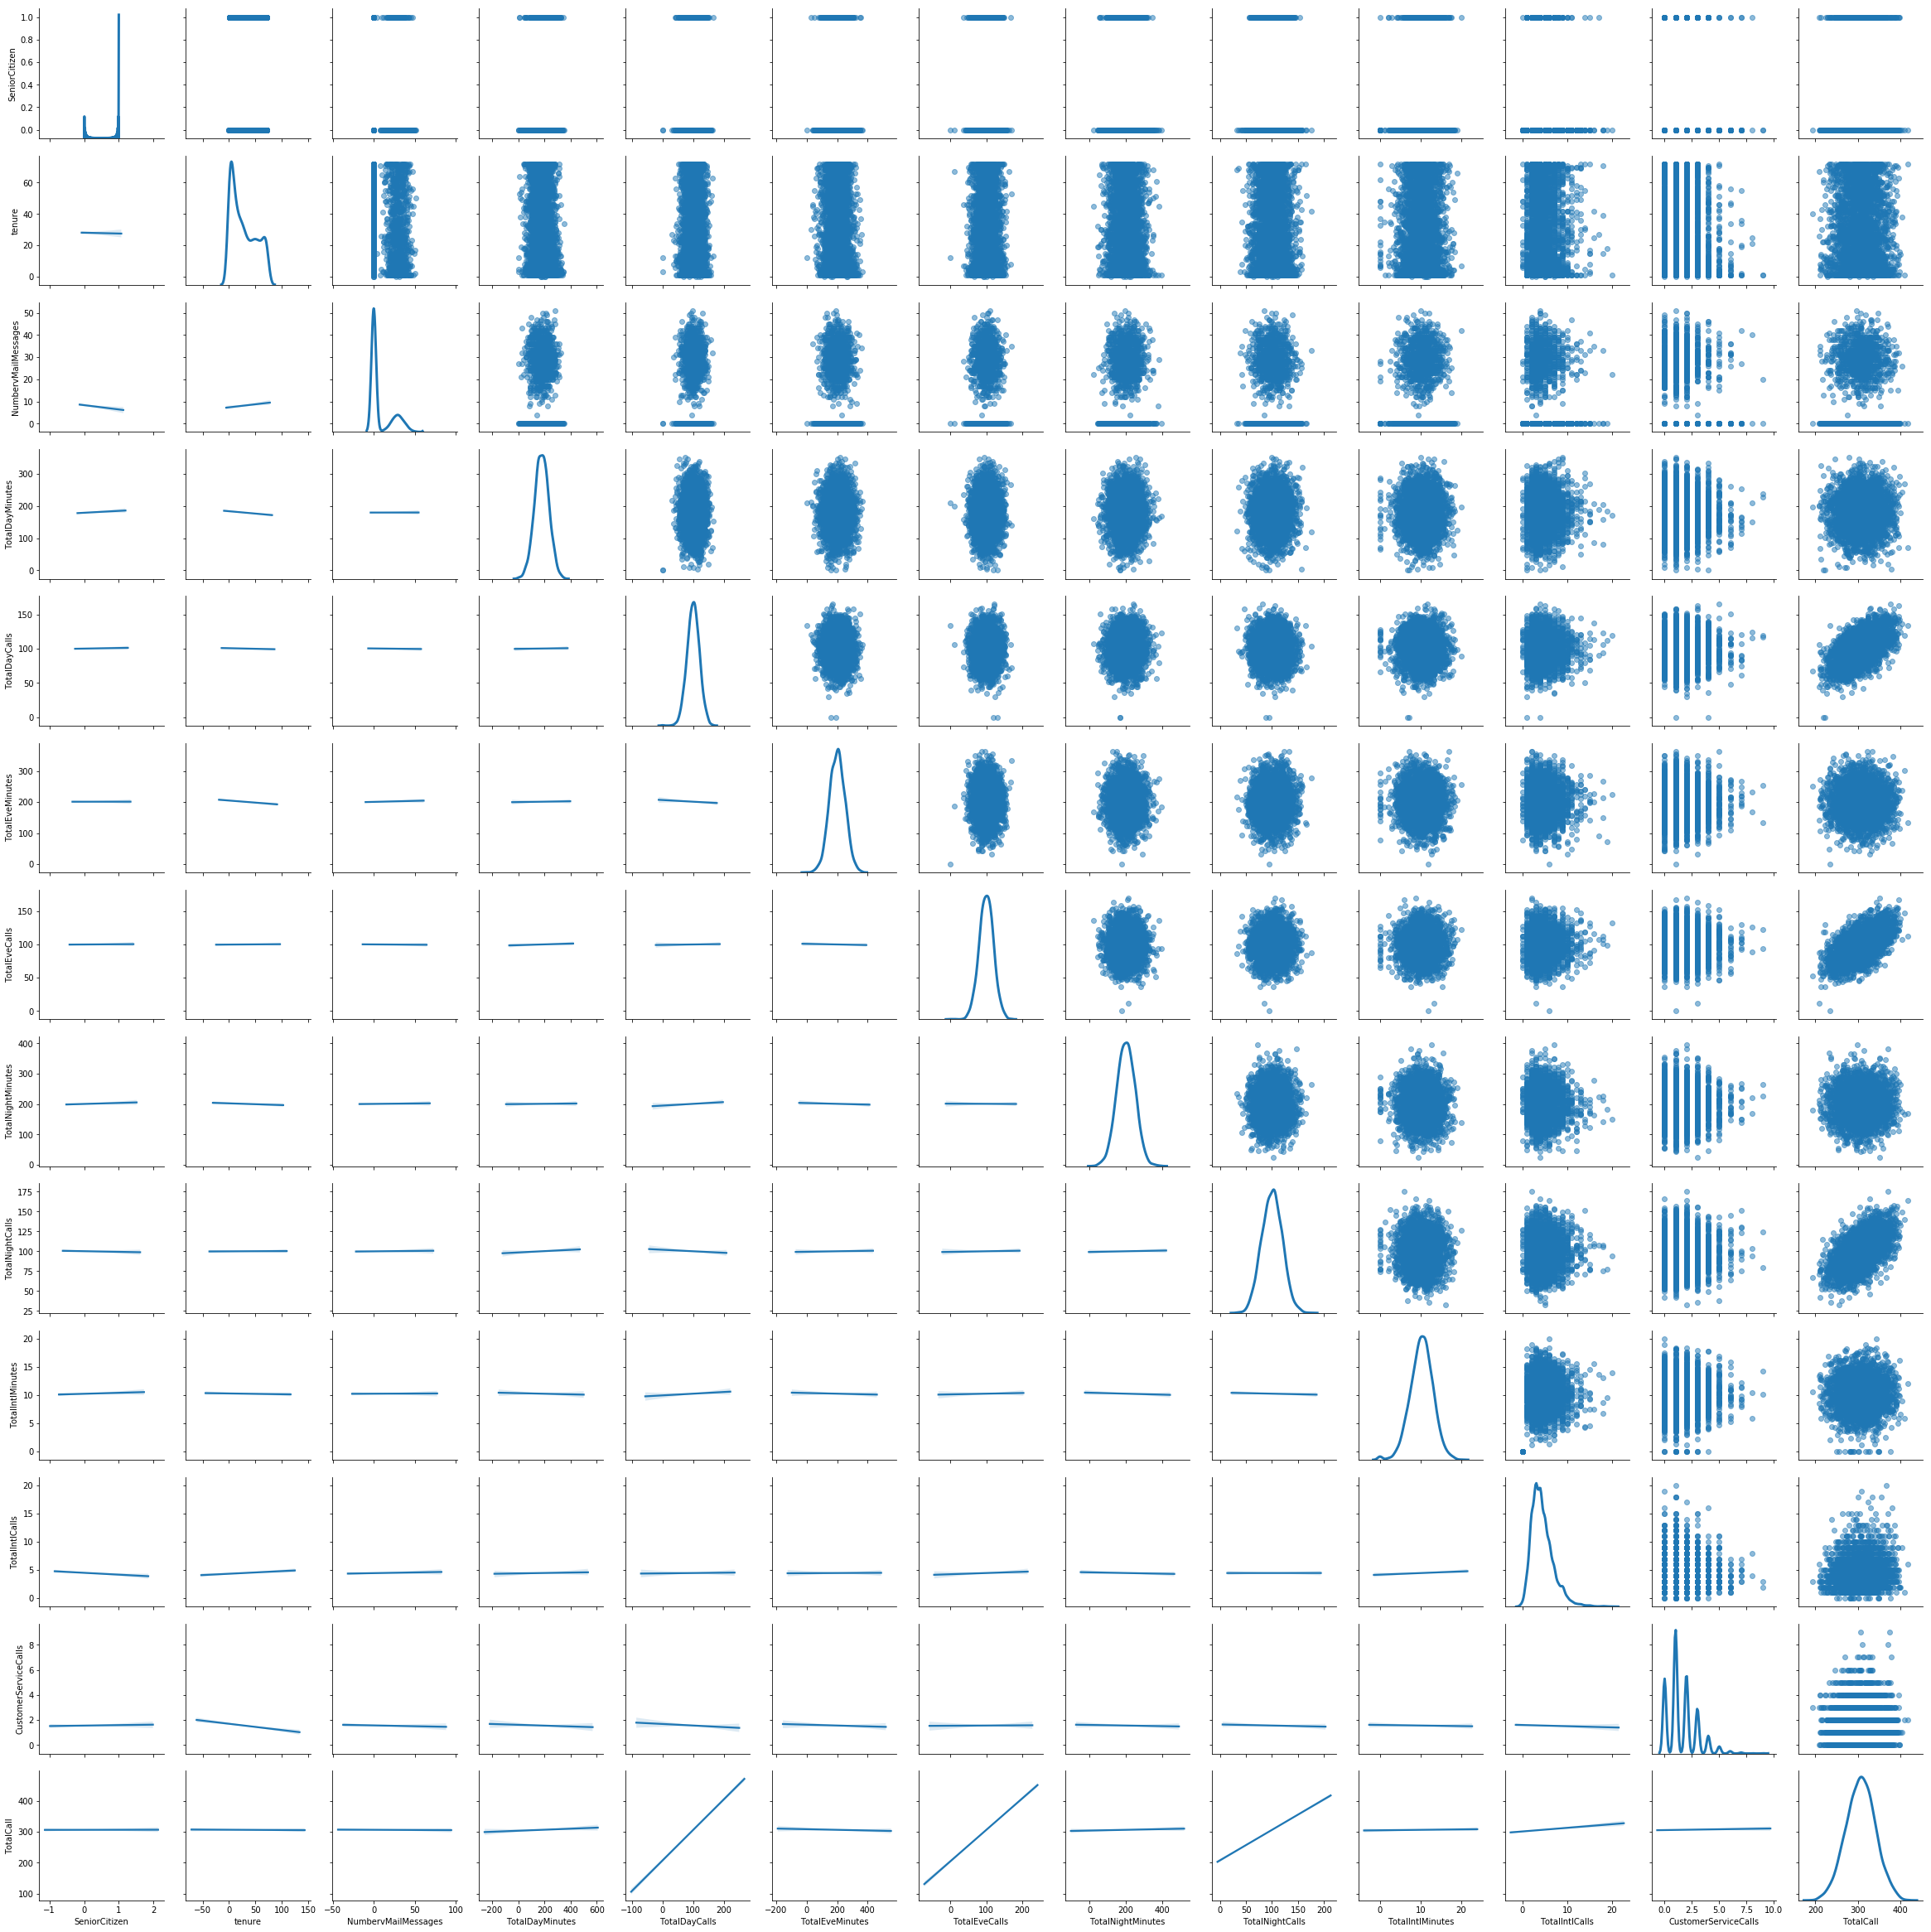

In [6]:
g = sns.PairGrid(dt_call.dropna(), diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot,lw=3)
plt.show()

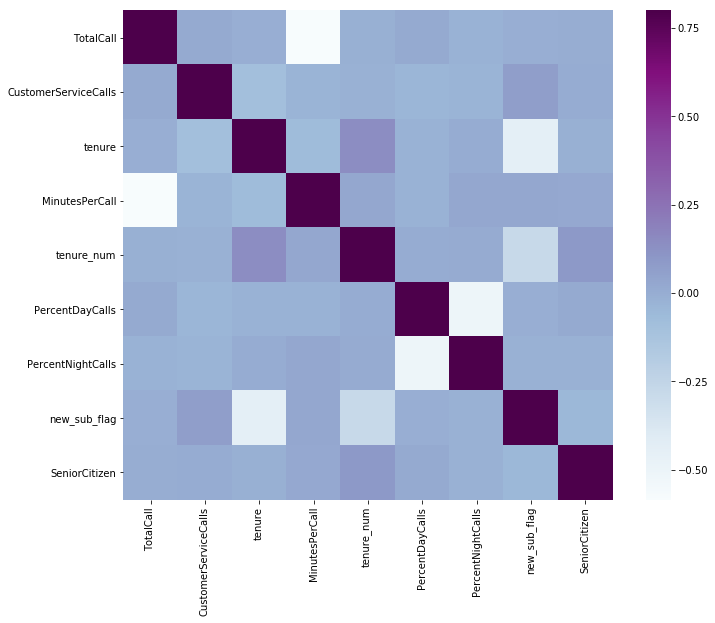

In [10]:
# Make the correlation matrix.
corrmat = dt_call.corr()
#print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True, cmap='BuPu')
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.


In [80]:
dt_call.columns

Index(['gender', 'SeniorCitizen', 'MaritalStatus', 'InternetService',
       'OnlineSecurity', 'Contract', 'PaperlessBilling', 'NumbervMailMessages',
       'TotalDayMinutes', 'TotalIntlMinutes', 'TotalIntlCalls',
       'CustomerServiceCalls', 'TotalCall', 'Churn', 'MinutesPerCall',
       'PercentNightCalls', 'PercentDayCalls', 'tenure_num', 'new_sub_flag',
       'messages'],
      dtype='object')

In [110]:
dt_call = dt_call[['gender', 'SeniorCitizen', 'MaritalStatus', 
                   'InternetService', 'Contract', 
                   'PaperlessBilling', 'NumbervMailMessages',
                   'TotalDayMinutes', 'TotalIntlMinutes',
                   'TotalIntlCalls', 'CustomerServiceCalls', 
                   'TotalCall', 'Churn', 'MinutesPerCall', 
                   'PercentNightCalls', 'PercentDayCalls', 
                   'tenure_num', 'new_sub_flag', 'messages' ]]

In [81]:
dt_call['InternetFiberOptic'] = np.where(dt_call['InternetService']=='Fiber optic', 1, 0)
dt_call['InternetDSL'] = np.where(dt_call['InternetService']=='DSL', 1, 0)
dt_call['Contract2year'] = np.where(dt_call['Contract']=='Two year', 1, 0)
dt_call['Contract1year'] = np.where(dt_call['Contract']=='One year', 1, 0)
#dt_call = pd.get_dummies(dt_call, drop_first=True)

In [37]:
continuous = ['TotalCall', 'CustomerServiceCalls', 'tenure',
       'MinutesPerCall', 'tenure_num', 'PercentDayCalls', 
        'PercentNightCalls']

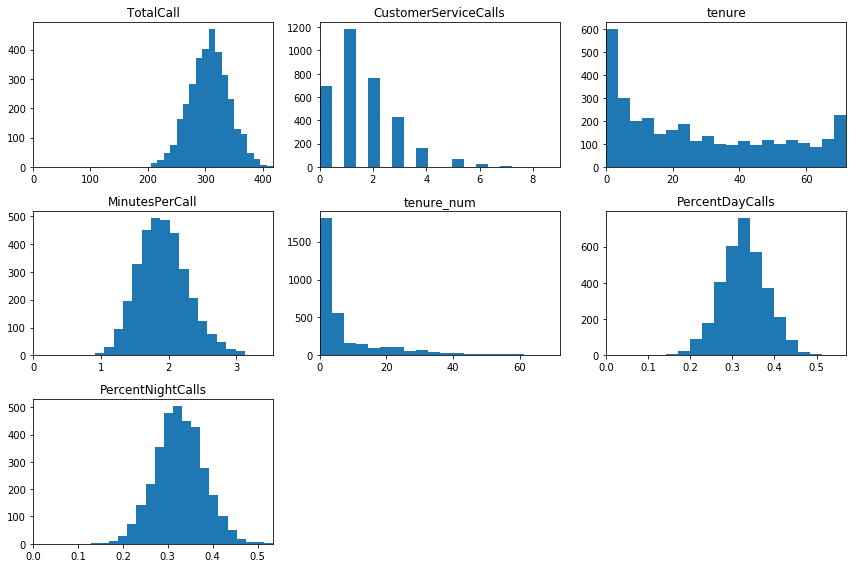

In [38]:
plt.figure(figsize=(12,8))
n = 0

for x in continuous:    
    n=n+1
    plt.subplot(3,3,n)
    plt.hist(dt_call[x], bins=20)
    plt.xlim(0,dt_call[x].max())
    plt.xlabel('')
    plt.ylabel('')
    
    plt.title(x)
plt.tight_layout()
plt.show()

### Univariate Data Exploration

## Continuous & Categorical Pair
* Box, violin or similar plots estimate value of continuous variable for each value of the categorical variable
* Descriptive statistics, including etimates of entral tendency and variance, for continuous variable at each level of thec ategorical variable
* T-Tests
* ANOVA
Look for outliers in each group

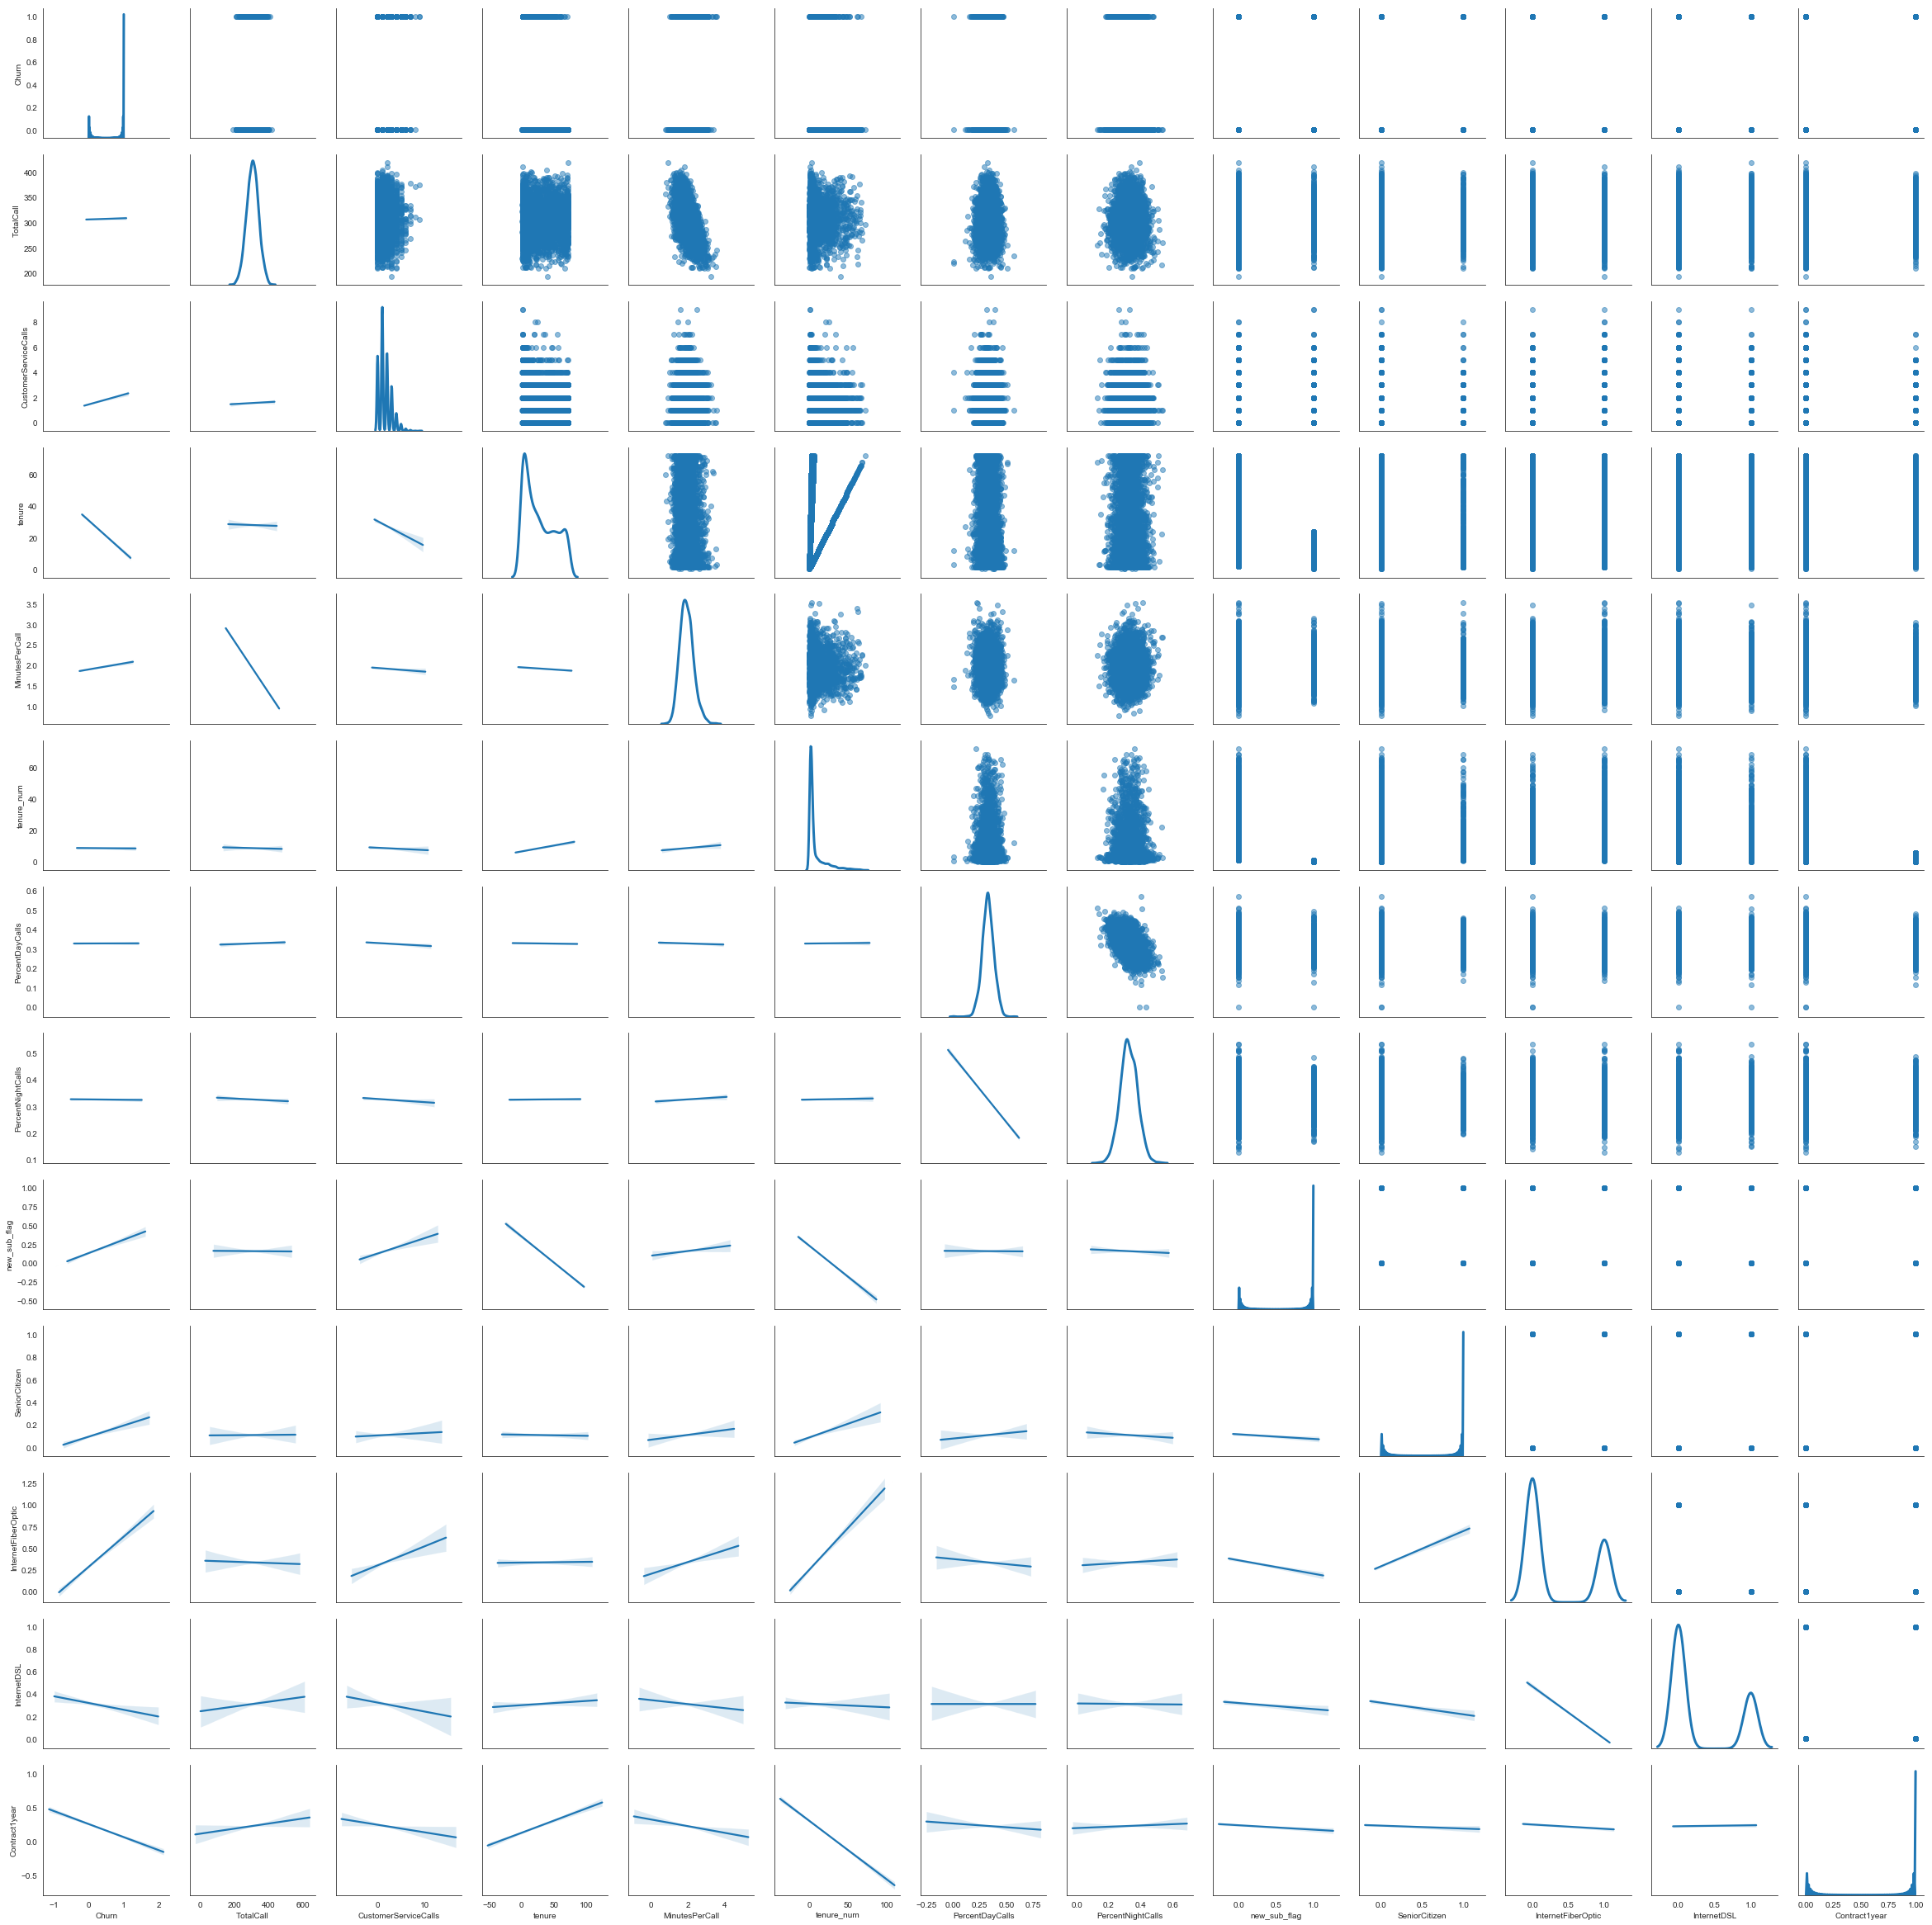

In [92]:
g = sns.PairGrid(dt_call.dropna(), diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot,lw=3)
plt.show()

In [111]:
df_majority = dt_call[dt_call.Churn==0]
df_minority = dt_call[dt_call.Churn==1]

# Downsample Majority Class
df_majority_downsampled = resample(df_majority,
                                  replace=False,   # sample without replacement
                                  n_samples=483,   # to match minority class
                                  random_state=123 # reproducible results
                                  )

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# New Class Counts
df_downsampled.Churn.value_counts()

1    483
0    483
Name: Churn, dtype: int64

In [86]:
categorical_list = []
numerical_list = []
for i in df_downsampled.columns.tolist():
    if df_downsampled[i].dtype=='object':
        categorical_list.append(i)
    else:
        numerical_list.append(i)
print('Number of categorical features:', str(len(categorical_list)))
print('Number of numerical features:', str(len(numerical_list)))

Number of categorical features: 0
Number of numerical features: 27


In [112]:
df_downsampled = pd.get_dummies(df_downsampled, drop_first=True)

In [85]:
df_downsampled

,SeniorCitizen,NumbervMailMessages,TotalDayMinutes,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,TotalCall,Churn,MinutesPerCall,PercentNightCalls,...,Contract1year,gender_Male,MaritalStatus_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes
2231,0,0,263.4,10.7,2,2,302,0,2.098675,0.334437,...,1,1,0,1,0,0,1,1,0,0
1802,0,0,134.8,7.7,5,2,304,0,1.524671,0.404605,...,0,1,0,0,0,0,0,0,0,1
3247,0,0,128.6,11.4,2,0,312,0,1.516667,0.362179,...,0,0,1,0,1,1,0,0,1,0
312,0,0,104.7,15.8,7,3,336,0,1.060417,0.327381,...,1,1,1,0,1,1,0,1,0,0
2707,0,36,309.9,14.2,2,1,287,0,2.417073,0.365854,...,0,0,1,0,0,0,1,0,1,0
3093,0,23,157.6,13.7,2,0,339,0,1.958112,0.330383,...,0,1,0,0,1,1,0,0,0,0
2898,0,0,102.0,11.4,3,2,362,0,1.115746,0.290055,...,0,1,0,1,0,0,0,0,0,1
2926,0,0,224.2,12.0,8,3,248,0,2.481048,0.266129,...,0,1,0,0,0,0,1,0,0,1
1002,0,0,117.1,11.1,4,3,299,0,1.768896,0.280936,...,0,1,0,0,1,1,0,0,0,1
31,1,0,147.1,12.2,3,0,316,0,1.685759,0.363924,...,0,1,1,1,0,0,0,0,0,1


In [113]:
X = df_downsampled.drop(['Churn'],axis=1)
y = df_downsampled.Churn
feature_name = X.columns.tolist()

# Pearson Correlation without normalization

In [114]:
def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)

    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = np.abs(cor_list).tolist()
    dt_corr = pd.DataFrame(data={'features':cor_feature,'cor_support':cor_support})
    dt_corr = dt_corr.sort_values(by='cor_support', ascending=False)
    return dt_corr

In [115]:
cor_selector(X,y)

,features,cor_support
18,InternetService_Fiber optic,0.388717
15,TotalDayMinutes,0.357527
16,Contract_One year,0.346998
17,InternetService_No,0.262305
2,gender_Male,0.249471
5,TotalCall,0.245947
11,MaritalStatus_Yes,0.217236
19,Contract_Two year,0.198223
14,CustomerServiceCalls,0.194608
0,TotalIntlCalls,0.175935


In [123]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=10)
chi_selector.fit(X_norm, y)

SelectKBest(k=10, score_func=<function chi2 at 0x1a19203598>)

In [124]:
print(chi_selector.pvalues_)

[3.63893581e-07 2.29626210e-03 5.85402521e-02 4.88622410e-01
 9.69104512e-01 2.95524539e-03 6.64891560e-01 1.90971030e-01
 7.87103861e-01 8.86188446e-01 6.70693975e-01 2.50481521e-09
 5.12393511e-06 4.94907904e-01 2.66795459e-06 2.40830827e-16
 1.71788100e-20 8.02315424e-14 4.45823431e-29 4.56518406e-05]


In [121]:
chi_selector.get_params

<bound method BaseEstimator.get_params of SelectKBest(k=10, score_func=<function chi2 at 0x1a19203598>)>

In [127]:
chi_selector.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True,  True])

In [128]:
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

10 selected features


In [130]:
chi_feature

['SeniorCitizen',
 'NumbervMailMessages',
 'new_sub_flag',
 'messages',
 'MaritalStatus_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes']